# Muliplte Linear Regression 2 features (from scratch)

## Batch Gradient Descent 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rs_df = pd.read_csv("./Realestate.csv")
rs_df.drop(columns = ["No", "X3 distance to the nearest MRT station" , "X4 number of convenience stores", "X5 latitude", "X6 longitude"], axis=1, inplace=True)
rs_df.head()

,X1 transaction date,X2 house age,Y house price of unit area
0,2012.917,32.0,37.9
1,2012.917,19.5,42.2
2,2013.583,13.3,47.3
3,2013.500,13.3,54.8
4,2012.833,5.0,43.1


In [4]:
X = rs_df.iloc[:,:-1]
Y = rs_df.iloc[:,-1].to_numpy().reshape(-1,1)

X.shape, Y.shape

((414, 2), (414, 1))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((289, 2), (289, 1))

In [6]:
# devide x1 and x2

In [7]:
import numpy as np

class MultipleLinearRegressionFor2Input:
    def __init__(self, epoch=1000):
        self.w0 = None
        self.w1 = None
        self.w2 = None
        self.epoch = epoch

    def fit(self, X, Y, lr=0.0000001):
        self.w0 = np.random.rand(1)
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)
        
        X1 = X[:, 0].reshape(-1, 1)
        X2 = X[:, 1].reshape(-1, 1)
        
        for i in range(self.epoch):
            # Calculate predictions
            Y_pred = self.predict(X)

            # Calculate gradients
            loss = 2 * (Y_pred - Y)  # Gradient of MSE
            dw0 = np.sum(loss)
            dw1 = np.sum(loss * X1)
            dw2 = np.sum(loss * X2)

            # Update weights
            self.w0 -= lr * dw0
            self.w1 -= lr * dw1
            self.w2 -= lr * dw2

            # # Logging at intervals
            # if i % (self.epoch // 10) == 0 or i == self.epoch - 1:
            #     mse = (np.mean((Y_pred - Y) ** 2)) ** (1/2)
            #     print(f"Epoch {i+1}/{self.epoch}, Loss (RMSE): {mse:.4f}")
        mse = (np.mean((Y_pred - Y) ** 2)) ** (1/2)
        print(f"Epoch {i+1}/{self.epoch}, Loss (RMSE): {mse:.4f}")        
        print(f"Final weights: w0 = {self.w0[0]:.4f}, w1 = {self.w1[0]:.4f}, w2 = {self.w2[0]:.4f}")

    def predict(self, X):
        X1 = X[:, 0].reshape(-1, 1)
        X2 = X[:, 1].reshape(-1, 1)
        return self.w0 + self.w1 * X1 + self.w2 * X2


In [8]:
multiple_model = MultipleLinearRegressionFor2Input()
# multiple_model.fit(X_train, Y_train, 0.0000000001)
multiple_model.fit(X_train, Y_train, 1e-10)


Epoch 1000/1000, Loss (RMSE): 17.6517
Final weights: w0 = 0.3950, w1 = 0.0118, w2 = 0.8285


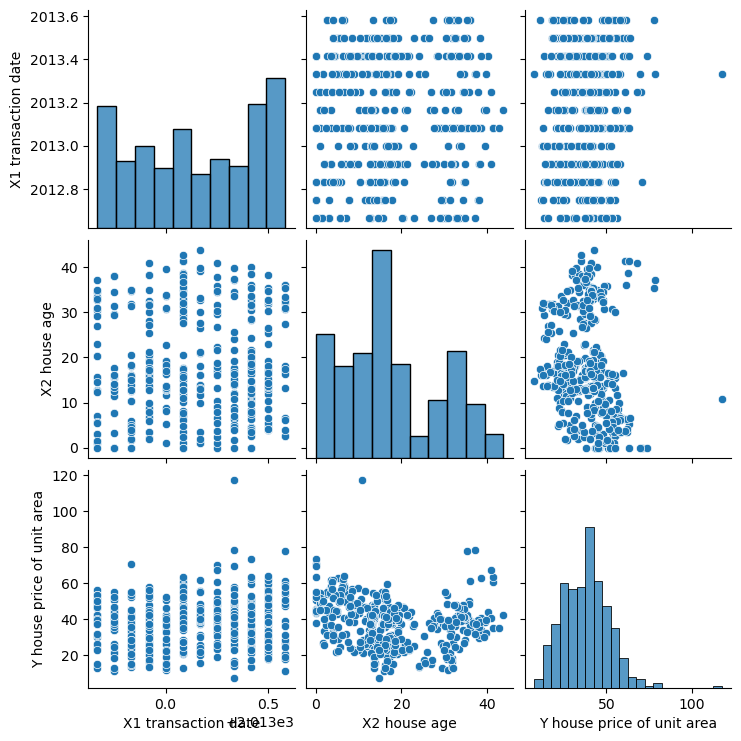

In [9]:
sns.pairplot(rs_df)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

m = LinearRegression()
m.fit(X_train,Y_train)
y_pred = m.predict(X_train)
print(root_mean_squared_error(Y_train, y_pred))
print(r2_score(Y_train, y_pred))
print(m.coef_, m.intercept_)

12.618558589915143
0.060047609764369625
[[ 4.00980916 -0.27285301]] [-8029.33030462]


## Batch Gradient Descent (for any no of input)

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [168]:
rs_df = pd.read_csv("./Realestate.csv")
rs_df.drop(columns = ["No"], axis=1, inplace=True)
rs_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [169]:
X = rs_df.iloc[:,:-1]
Y = rs_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, Y.shape

((414, 6), (414, 1))

In [170]:
# from sklearn.model_selection import train_test_split
# X_test,

In [218]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class MultipleLinearRegression:
    def __init__(self, epoch=2000):
        self.W = None
        self.epoch = epoch

    def predict(self, X):
        noOfDataPoints = X.shape[0]
        addOnes = np.ones(shape=(noOfDataPoints, 1))
        XOnes = np.hstack((addOnes, X))
        return np.dot(XOnes, self.W)

    def fit(self, X, Y, lr=0.01):
        # # Normalize X
        # scaler = StandardScaler()
        # X_scaled = scaler.fit_transform(X)
        X_scaled = X


        noOfDataPoints = X_scaled.shape[0]
        addOnes = np.ones(shape=(noOfDataPoints, 1))
        XOnes = np.hstack((addOnes, X_scaled))

        noOfInputFeatures = X_scaled.shape[1]
        self.W = np.random.rand(noOfInputFeatures + 1, 1)

        Y = Y.reshape(-1, 1)

        for i in range(self.epoch):
            gradient = np.matmul(XOnes.T, (np.dot(XOnes, self.W) - Y)) * 2 / noOfDataPoints
            self.W = self.W - lr * gradient


        print("Final Weights:")
        print(self.W)

# m = MultipleLinearRegression()
# m.fit(X, Y)

In [224]:
# rs_df.head()
X = rs_df["X2 house age"].to_numpy().reshape(-1,1)
Y = rs_df.iloc[:,-1].to_numpy().reshape(-1,1)

m = MultipleLinearRegression()
m.fit(X, Y, 0.001)

Final Weights:
[[29.2684986 ]
 [ 0.27503547]]


In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

s = LinearRegression()
s.fit(X,Y)
y_pred = s.predict(X)
print(root_mean_squared_error(X, Y))
print(r2_score(Y, y_pred))
print(s.coef_, s.intercept_)

28.10808589629723
0.04433848097791171
[[-0.25148842]] [42.43469705]


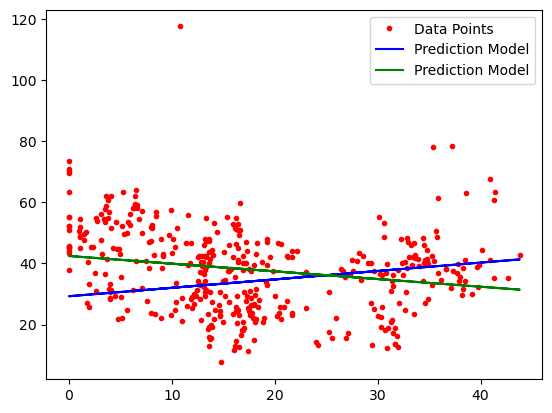

In [226]:
plt.plot(X,Y, "r.",label="Data Points")
plt.plot(X, m.predict(X), "b-", label="Prediction Model")
plt.plot(X, s.predict(X), "g-", label="Prediction Model")
plt.legend()
plt.show()

In [222]:
lr_list = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

In [227]:
# print(X.shape, Y.shape)
# for i in lr_list:
#     k = MultipleLinearRegression()
#     k.fit(X,Y, lr=i)
#     plt.clf()
#     plt.plot(X,Y, "r.",label="Data Points")
#     plt.plot(X, k.predict(X), "b-", label="Prediction Model")
#     plt.plot(X, s.predict(X), "g-", label="Prediction Model")
#     plt.legend()
#     plt.show()
#     del k

# using polynomail Regression


In [250]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

poly_model = PolynomialFeatures(degree=5, include_bias=True)

X_train_poly = poly_model.fit_transform(X)
X_test_poly = poly_model.transform(X)
print("X_train_Poly :: ", X_train_poly.shape)
linear_poly = LinearRegression()
linear_poly.fit(X_train_poly, Y)
Y_pred_train_poly = linear_poly.predict(X_train_poly)


print("RMSE :: ", root_mean_squared_error(Y, Y_pred_train_poly))
print("R2-Score :: ", r2_score(Y, Y_pred_train_poly))



X_train_Poly ::  (414, 6)
RMSE ::  12.070345676457318
R2-Score ::  0.21114417197798407


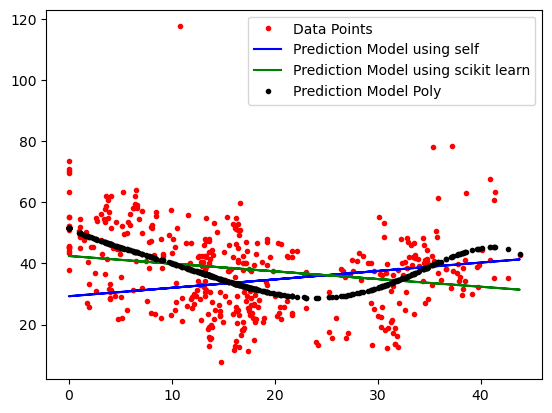

In [253]:
plt.plot(X,Y, "r.",label="Data Points")
plt.plot(X, m.predict(X), "b-", label="Prediction Model using self")
plt.plot(X, s.predict(X), "g-", label="Prediction Model using scikit learn")
plt.plot(X, Y_pred_train_poly, "k.", label="Prediction Model Poly")

plt.legend()
plt.show()

# Linear Regression VS Polynomial Regression

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [291]:
rs_df = pd.read_csv("./Realestate.csv")
# rs_df.drop("Index", axis=1, inplace=True)
rs_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [292]:
# rs_df.head()
X = rs_df["X2 house age"].to_numpy().reshape(-1,1)
Y = rs_df.iloc[:,-1].to_numpy().reshape(-1,1)
X.shape, Y.shape

((414, 1), (414, 1))

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
X_train.shape, Y_train.shape

((289, 1), (289, 1))

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

linear = LinearRegression()

linear.fit(X_train , Y_train)

YTrain = linear.predict(X_train)
YTest = linear.predict(X_test)

print("Test R2 Score :: ", r2_score(Y_test, YTest))
print("Train R2 Score :: ", r2_score(Y_train, YTrain))


Test R2 Score ::  0.024774270879821647
Train R2 Score ::  0.05268348195515693


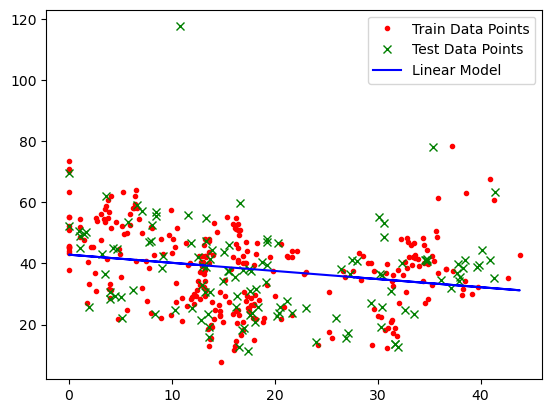

In [296]:
plt.plot(X_train,Y_train,"r.", label="Train Data Points")
plt.plot(X_test,Y_test,"gx", label="Test Data Points")

plt.plot(X_train,YTrain,"b-", label="Linear Model")

plt.legend()
plt.show()

In [299]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

poly_model = PolynomialFeatures(degree=3, include_bias=True)

X_train_poly = poly_model.fit_transform(X_train)
print(X_train_poly.shape)

linear_poly = LinearRegression()
linear_poly.fit(X_train_poly, Y_train)

YPolyTrain = linear_poly.predict(X_train_poly)

X_test_poly = poly_model.fit_transform(X_test)
YPolyTest = linear_poly.predict(X_test_poly)


print("Test R2 Score :: ", r2_score(Y_test, YPolyTest))
print("Train R2 Score :: ", r2_score(Y_train, YPolyTrain))


(289, 4)
Test R2 Score ::  0.12869043037594563
Train R2 Score ::  0.24259513326132054


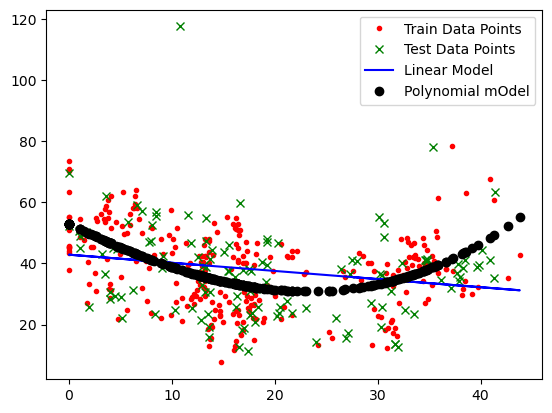

In [300]:
plt.plot(X_train,Y_train,"r.", label="Train Data Points")
plt.plot(X_test,Y_test,"gx", label="Test Data Points")

plt.plot(X_train,YTrain,"b-", label="Linear Model")
plt.plot(X_train, YPolyTrain, "ko", label="Polynomial mOdel")

plt.legend()
plt.show()